# Theoretical physics with sympy
## Florian Thöle, Materials Theory at ETH Zurich
## Twitter: @florian_thl | Mail: florian.thoele@mat.ethz.ch

## Intro

Sometimes it's good to be able to derive results on a blackboard, sometimes symbolic computing can make your life a lot easier.

## The program
- Ca. 10 minutes introduction into the basic features I'll need later
- Spend the rest of the time explaining an example of 2D magnetism

### What this talk is...
- A lighthearted introduction to sympy

### What this talk is not...
- A research talk on theoretical physics
- A description of the sympy.physics module

## Setup for sympy printing

Printing with Latex is a bit slower, but looks nice for presentation purposes.

In [1]:
from sympy import init_printing, pprint
init_printing(use_unicode=True, use_latex=True)

## Variables - mathematica vs python

In Mathematica, syntax highlighting tells us the difference between a mathematic symbol, a variable which was defined before, and a local variable in a function.

![title](Mathematica_variables.png)

In python, this distinction does not exist in the language itself, so we have to define each mathematical symbol we want to use.

### Symbols

In [2]:
from sympy import symbols, sympify, S, sqrt

In [3]:
x = symbols("x")

In [4]:
x

In [5]:
type(x)

sympy.core.symbol.Symbol

In [6]:
a, b, c, y, z = symbols("a b c y z", real=True)

The assumptions on the symbols are used in evaluating expressions:

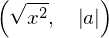

In [7]:
sqrt(x**2), sqrt(a**2)

### sympify

The python-internal data types int and float are different from sympys internal int and float types.

sympify can be used to convert a python type to a sympy type.

In [8]:
type(3)

int

In [9]:
type(sympify(3))

sympy.core.numbers.Integer

In [10]:
1/3

In [11]:
sympify(1)/3

In [12]:
type(sympify(1)/3)

sympy.core.numbers.Rational

sympify can also be used to convert strings into sympy expressions:

In [13]:
expr = sympify("3*x**2 + 2*x + 4"); 
expr

In [14]:
expr.subs(x, 2)

### Functions

Special functions are able to work with symbolic variables.

In [15]:
from sympy import sin, cos, exp, log, sqrt, Ynm
from sympy import pi, N

In [16]:
sin(x + y)

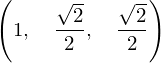

In [17]:
sin(pi/2), sin(45*pi/180), sin(0.25*pi)

In [18]:
type(pi)

sympy.core.numbers.Pi

In [19]:
exp(log(x))

In [20]:
n = 2
m = -2
theta, phi = symbols("theta phi")
sph = Ynm(n, m, theta, phi)
sph

Functions are treated as symbolic even with numerical arguments. Use N() to evaluate the function.

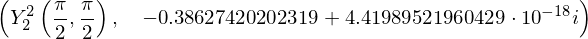

In [21]:
Ynm(n, m, pi/2, pi/2), N(Ynm(n, m, pi/2, pi/2))

#### Differentiating

In [22]:
from sympy import diff

In [23]:
diff((a*x + b*y)**2, x)

In [24]:
diff(sin(x + a)*exp(b*x), x, 2)

In [25]:
diff(sin(a*x + b*y), x, y)

## Solving

### Equations

solveset solves equations and returns the set of solutions since there could be one, zero or multiple solutions for a given equation.

In [26]:
from sympy import solveset, Eq, Q

In [27]:
Eq(x**2 + y, 2)

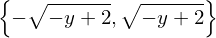

In [28]:
solveset(Eq(x**2 + y, 2), x)

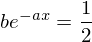

In [29]:
halflife_equation = Eq(b*exp(-a*x), S(1)/2)
halflife_equation

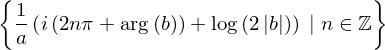

In [30]:
sln = solveset(halflife_equation, x); sln

The solution to this equation is a function of the integers Z. ImageSet maps Z to a function.

In [31]:
type(sln)

sympy.sets.fancysets.ImageSet

We have access to the evaluated function through "lamda" (note spelling).

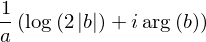

In [32]:
sln.lamda(0)

### Ordinary differential equations

In [33]:
from sympy import dsolve, Function, Derivative

Declaring a variable as function allows to treat symbolic derivates.

In [34]:
f = Function("f")
g = Function("g")

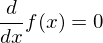

In [35]:
Eq(f(x).diff(x), 0)

In [36]:
dsolve(Eq(f(x).diff(x), 0), f(x))

Let's solve the differential equation for a harmonic oscillation with damping.

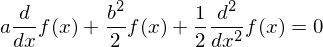

In [37]:
diffeq = Eq(f(x).diff(x, 2)/2 + a*f(x).diff(x) + b**2/2*f(x), 0); diffeq

In [38]:
result= dsolve(diffeq, f(x)); result

We can also use another function in the differential equation.

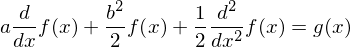

In [39]:
diffeq_driven = Eq(f(x).diff(x, 2)/2 + a*f(x).diff(x) + b**2/2*f(x), g(x))
diffeq_driven

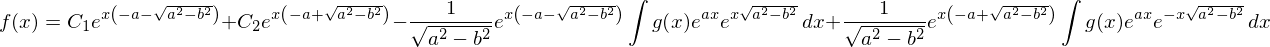

In [40]:
result_driven = dsolve(diffeq_driven, f(x)); result_driven

## Rewriting

### Common subexpressions
Common subexpressions allow to simplify complex expressions.

In [41]:
from sympy import cse, simplify, expand, expand_trig, expand_complex, expand_power_exp, expand_func

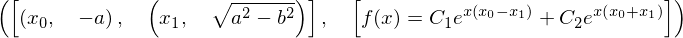

In [42]:
cse(result)

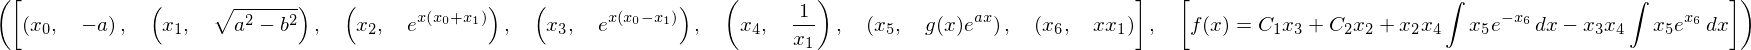

In [43]:
cse(result_driven)

### Substitution
We can subsitute symbols for numerical values or other symbolic expressions.

In [44]:
result

In [45]:
result.subs(a, 0)

In [46]:
mx, my, mz, tx, ty, tz = symbols("m_x m_y m_z t_x t_y t_z")

In [47]:
terms = 2*(x*my - y*mx)

In [48]:
terms.subs(x*my, tx+y*mx)

### Simplify, expand

In [49]:
sin(x)**2 + cos(x)**2

In [50]:
simplify(sin(x)**2 + cos(x)**2)

In [51]:
expand_trig(sin(x+y))

## Vectors and matrices

### Matrix and MatrixSymbol

In [52]:
from sympy import Matrix, MatrixSymbol

A matrix can be explicitly constructed:

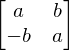

In [53]:
X = Matrix([[a, b], [-b, a]]); X

Functions of matrices are available:

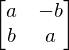

In [54]:
X.T

In [55]:
X.det(), X.trace()

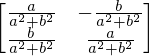

In [56]:
simplify(X.inv())

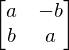

In [57]:
simplify(X.inv() * X.det())

In [58]:
X.eigenvals()

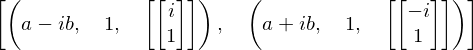

In [59]:
X.eigenvects()

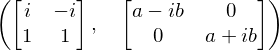

In [60]:
X.diagonalize()

Matrix multiplication works directly. The dot function is less strict about the dimensions of the vector on the right hand side.

In [61]:
Y = Matrix([[0, -c],[c, 0]])

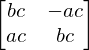

In [62]:
X*Y

In [63]:
X.dot(Y)

Special functions are available to construct matrices. Here: Construct a rotation matrix around the z-axis (3-axis) and apply it to a vector.

In [64]:
rot_axis3(a)*Matrix([x,y,z])

NameError: name 'rot_axis3' is not defined

### Vector - reference to a coordinate system

Note: In sympy 1.1, use CoordSys3D instead of CoordSysCartesian.

In [ ]:
from sympy import rot_axis3

In [ ]:
from sympy.vector import CoordSysCartesian, Del

In [ ]:
C = CoordSysCartesian("C")

We have access to the basis vector i, j, k of the coordinate system:

In [ ]:
v1 = a*C.i + b*C.j + 5*C.k
v1

Dot and cross product between vectors:

In [ ]:
v2 = x*C.i + 2*C.k
v1.dot(v2), v1.cross(v2)

For vector fields, we can also access the coordinate vectors x, y, z:

In [ ]:
field = sin(C.x**2) * C.y

In [ ]:
delop = Del(C)
delop(field)

In [ ]:
delop(field).doit()